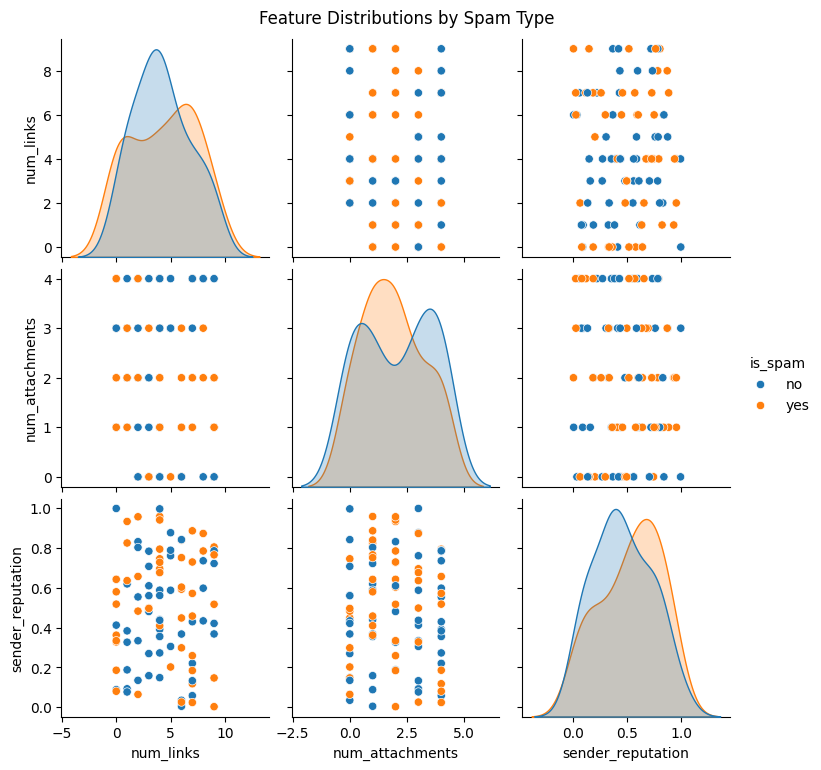

Classification Report on Test Set:
              precision    recall  f1-score   support

          no       0.57      0.73      0.64        11
         yes       0.50      0.33      0.40         9

    accuracy                           0.55        20
   macro avg       0.54      0.53      0.52        20
weighted avg       0.54      0.55      0.53        20



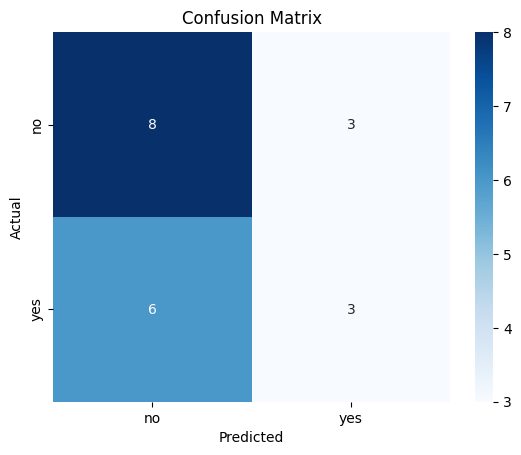

Average Cross-Validation Accuracy: 0.55


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("spam_emails.csv")

# Encode target labels
label_encoder = LabelEncoder()
df['is_spam_encoded'] = label_encoder.fit_transform(df['is_spam'])  # 'no' -> 0, 'yes' -> 1

# Visualize feature distributions
sns.pairplot(df, hue='is_spam', vars=['num_links', 'num_attachments', 'sender_reputation'])
plt.suptitle("Feature Distributions by Spam Type", y=1.02)
plt.show()

# Features and labels
X = df[['num_links', 'num_attachments', 'sender_reputation']]
y = df['is_spam_encoded']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Cross-validation accuracy
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Average Cross-Validation Accuracy:", round(cv_scores.mean(), 2))